<a href="https://colab.research.google.com/github/jacobdwatters/Machine-Learning-Basics/blob/main/logistic_regression/01_logistic_regression_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression With NumPy

#### Imports and Setup

In [107]:
import numpy as np
import matplotlib.pyplot as plt

---

## 1. Define the Logistic Regression Class

---

In [108]:
class LogisticRegression:
  def __init__(self, lr=0.05, iterations=1000):
    self.lr = lr
    self.iterations = iterations 

  def sigmoid(self, X):
    return 1 / (1+np.exp(-X@self.w))
  
  def bce_grad(self, X, y):
    return X.T@(self.sigmoid(X)-y)

  def fit(self, X, y):
    V = np.column_stack((np.ones(len(X)), X))
    self.w = np.random.randn(len(V[0])).reshape(-1, 1)
    
    # Gradient Descent
    for i in range(self.iterations):
      self.w = self.w - self.lr*self.bce_grad(V, y)

  def predict(self, X):
    V = np.column_stack((np.ones(len(X)), X))
    return self.sigmoid(V)

  def __str__(self):
    model_str = 'y = 1 / [1 + e^{-('

    for i, w_i in enumerate(self.w.flatten()):
      model_str += str(w_i)

      if i>0:
        model_str += "x_" + str(i)
      if i!=len(self.w)-1:
        model_str += ' + '

    return model_str + ')}]'


X = np.array([-1.37, -1.75, -3.9, -3.0, -3.43, -4.68, 0.63, -7.1, -2.14, -2.95, -5.9, -0.64]).reshape(-1, 1)
y = np.array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0]).reshape(-1, 1)
logreg = LogisticRegression()
logreg.fit(X, y)

print(logreg)

y = 1 / [1 + e^{-(-9.36404537157435 + -3.238319271386703x_1)}]


#### Generate Dataset

[]

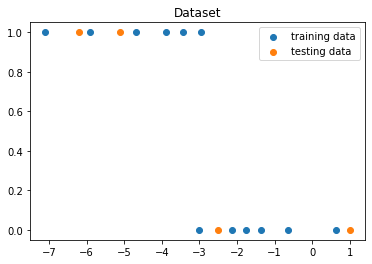

In [109]:
X_train = np.array([-1.37, -1.75, -3.9, -3.0, -3.43, -4.68, 0.63, -7.1, -2.14, -2.95, -5.9, -0.64]).reshape(-1, 1)
y_train = np.array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0]).reshape(-1, 1)

X_test = np.array([-6.2, -5.1, -2.5, 1]).reshape(-1, 1)
y_test = np.array([1, 1, 0, 0])

plt.scatter(X_train, y_train, c='tab:blue', label='training data')
plt.scatter(X_test, y_test, c='tab:orange', label='testing data')
plt.title("Dataset")
plt.legend()
plt.plot()

#### Fit a Logistic Regression Model to the Training Data

In [110]:
logreg = LogisticRegression(0.5)
logreg.fit(X_train, y_train)

print('Regression Model:\n', logreg, "\n")
print('Model Parameters:\n', logreg.w.flatten())

Regression Model:
 y = 1 / [1 + e^{-(-22.995165235542647 + -7.162474815410853x_1)}] 

Model Parameters:
 [-22.99516524  -7.16247482]


#### Model Visualization

[]

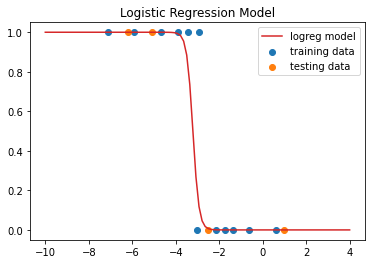

In [111]:
D = np.linspace(-10, 4, 100)
R = logreg.predict(D)

plt.scatter(X_train, y_train, c='tab:blue', label='training data')
plt.scatter(X_test, y_test, c='tab:orange', label='testing data')
plt.plot(D, R, c='tab:red', label='logreg model')
plt.title("Logistic Regression Model")
plt.legend()
plt.plot()